In [1]:
import numpy as np
import pandas as pd

In [4]:
def data_info(data):
    cols = (data.columns).tolist()
    print(f"Data info: {len(data)} rows x {len(cols)} columns")
    for idx, col in enumerate(cols):
        print(f"{idx}: {col}")
    return data, cols

def cols_setting(cols):
    drop_idx = input('Drop indexes: ')
    if drop_idx == "":
        drop_idx = []
    else:
        drop_idx = list(map(int, drop_idx.split(',')))
    label_idx = int(input('Label index: '))

    if label_idx < 0 or label_idx >= len(cols):
        print("Invalid label index!")
        return None, None

    drop_idx.append(label_idx)
    
    for idx in sorted(drop_idx, reverse=True):
        if idx == label_idx:
            label_col = cols[idx]
        del cols[idx]  

    return cols, label_col

def data_view(columns, null_value):
    null_list = []
    n = 0

    for i, col in enumerate(columns):
        if null_value[i] > 0:
            null_list.append([col, null_value[i]])
            n += 1

    null_df = pd.DataFrame(null_list, columns = ['columns', 'null_count'])
    return null_df

def null_processing(data):
    #결측 처리
    
    while(1): #예외 처리 필요!!
        null_df = data_view(data.columns, data.isnull().sum().tolist())
        print(f'Missing values: \n {null_df}')
    
        select_nan = int(input('1: Remove columns with NaN  2: Remove rows with NaN  3: Put the mean value  4: Put the median value  5: Put the other value  0: Exit'))
        if select_nan == 1:
            col_idx = input('Column(s) to remove: ')
            col_idx = list(map(int, col_idx.split(',')))
            drop_cols = [null_df['columns'][i] for i in col_idx]
            print(drop_cols)
            data.drop(labels=drop_cols,axis=1, inplace = True)
        elif select_nan == 2:
            col_idx = input('Row(s) to remove: ')
            col_idx = list(map(int, col_idx.split(',')))
            for i in col_idx:
                drop_idx = data[data[null_df['columns'][i]].isnull()].index
                data.drop(drop_idx,axis=0, inplace = True)
        elif select_nan == 3:
            col_idx = input('Column(s) to put the mean value: ')
            col_idx = list(map(int, col_idx.split(',')))
            for i in col_idx:
                data[null_df['columns'][i]].fillna(data[null_df['columns'][i]].mean(), inplace = True)
        elif select_nan == 4:
            col_idx = input('Column(s) to put the median value: ')
            col_idx = list(map(int, col_idx.split(',')))
            for i in col_idx:
                data[null_df['columns'][i]].fillna(data[null_df['columns'][i]].median(), inplace = True)
        elif select_nan == 5:
            col_idx = input('Column(s) to put the other value: ')
            col_idx = list(map(int, col_idx.split(',')))
            value = input('value: ')
            value = list(map(int, value.split(',')))
            for i in col_idx:
                data[null_df['columns'][i]].fillna(value[i], inplace = True)
        else:
            break

    return data

In [14]:
fpath = 'C://Users//user//OneDrive - 경희대학교//바탕 화면//KSJ//machine learning//substance//dataset'
fname = '//kyrbs_data.csv'
fname1 = '//YRBS_SUBSTANCE_230911.csv'
fname2 = '//ung_substance_2.csv'

In [16]:
fpath_py = fpath+fname
fpath_py1 = fpath+fname1
fpath_py2 = fpath+fname2

In [19]:
original_data = pd.read_csv(fpath_py)
extra_validation1 = pd.read_csv(fpath_py1)
extra_validation2 = pd.read_csv(fpath_py2)

In [20]:
original_data

,SEX,GRADE,region,bmi_2,economic,study,stress,alcoholic_consumption,smoking,depression,suicidalthinking,suicideattempts,drug
0,1.0,1.0,2.0,0.0,4.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,2.0,0.0,2.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,2.0,0.0,3.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,2.0,0.0,2.0,2.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,2.0,0.0,3.0,5.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145173,1.0,6.0,1.0,2.0,2.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0
1145174,2.0,6.0,1.0,2.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1145175,2.0,6.0,1.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1145176,1.0,6.0,1.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print("==========Data information===========")
data, cols = data_info(original_data)

==========Data information===========
Data info: 1145178 rows x 13 columns
0: SEX
1: GRADE
2: region
3: bmi_2
4: economic
5: study
6: stress
7: alcoholic_consumption
8: smoking
9: depression
10: suicidalthinking
11: suicideattempts
12: drug


In [23]:
print("==========Column setting===========")
data_cols, label_col = cols_setting(cols)
if data_cols is None or label_col is None:
    print("Failed to set columns!")
else:
    print("data_cols:", data_cols)
    print("label_col:", label_col)
    print("==========Column setting completed===========")

# drop_idx = 
# label_idx = 12
#ohe_cols, split, scaling
#p-value값 확인 후 빼야하는 것들

==========Column setting===========
data_cols: ['SEX', 'GRADE', 'region', 'bmi_2', 'economic', 'study', 'stress', 'alcoholic_consumption', 'smoking', 'depression', 'suicidalthinking', 'suicideattempts']
label_col: drug
==========Column setting completed===========


In [24]:
#결측 처리
print("==========Missing value preprocessing===========")
data = null_processing(original_data)
print("==========Missing value preprocessing completed===========")

#median으로 대체

==========Missing value preprocessing===========
Missing values: 
     columns  null_count
0  economic       48080


C:\Users\ksjro\AppData\Local\Temp\ipykernel_16768\297463004.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[null_df['columns'][i]].fillna(data[null_df['columns'][i]].median(), inplace = True)


Missing values: 
 Empty DataFrame
Columns: [columns, null_count]
Index: []
==========Missing value preprocessing completed===========


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve

def performance_metrics(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # 성능 지표 계산
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    auroc = roc_auc_score(y_true, y_pred_proba)
    
    return sensitivity, specificity, accuracy, balanced_accuracy, auroc

def adjusted_output(predictions, threshold):
    return (predictions >= threshold).astype(int)

def find_optimal_threshold(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    optimal_idx = np.argmin(np.abs(tpr - (1 - fpr)))
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

In [ ]:
from imblearn.over_sampling import SMOTE

# 데이터 준비
X = data[data_cols]
y = data[label_col]
X = X.select_dtypes(include=[np.number])

# SMOTE 적용
sample = SMOTE(random_state=1)
X_resampled, y_resampled = sample.fit_resample(X, y)
X_resampled = X_resampled.values
y_resampled = y_resampled.values

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from scipy.stats import sem, t

# Random Forest 매개변수 정의와 GridSearchCV
rf_param_grid = {
    'n_estimators': [120],
    'max_depth': [6],
    'max_features': ['sqrt'],
    'class_weight': [None]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_

# 10-fold 교차 검증
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 성능 지표 저장용 리스트
sensitivities, specificities, accuracies, balanced_accuracies, aurocs = [], [], [], [], []

for train_idx, test_idx in cv.split(X_resampled, y_resampled):
    cv_train_X, cv_test_X = X_resampled[train_idx], X_resampled[test_idx]
    cv_train_y, cv_test_y = y_resampled[train_idx], y_resampled[test_idx]

    # 최적의 하이퍼파라미터로 모델 학습
    best_model = RandomForestClassifier(**best_params, random_state=42)
    best_model.fit(cv_train_X, cv_train_y)

    # 성능 평가
    prob_rf = best_model.predict_proba(cv_test_X)[:, 1]

    # 최적의 threshold 찾기
    optimal_threshold = find_optimal_threshold(cv_test_y, prob_rf)

    # 최적의 threshold를 사용하여 예측값 조정
    y_pred_adjusted = adjusted_output(prob_rf, optimal_threshold)

    # Calculate confusion matrix using the adjusted predictions
    tn, fp, fn, tp = confusion_matrix(cv_test_y, y_pred_adjusted).ravel()

    # Calculate adjusted sensitivity and specificity
    adjusted_sensitivity = tp / (tp + fn)
    adjusted_specificity = tn / (tn + fp)
    adjusted_accuracy = accuracy_score(cv_test_y, y_pred_adjusted)
    adjusted_balanced_accuracy = balanced_accuracy_score(cv_test_y, y_pred_adjusted)
    auroc = roc_auc_score(cv_test_y, prob_rf)

    # 결과 저장
    sensitivities.append(adjusted_sensitivity)
    specificities.append(adjusted_specificity)
    accuracies.append(adjusted_accuracy)
    balanced_accuracies.append(adjusted_balanced_accuracy)
    aurocs.append(auroc)

# 성능 지표 출력
mean_sensitivity, se_sensitivity = np.mean(sensitivities), sem(sensitivities)
mean_specificity, se_specificity = np.mean(specificities), sem(specificities)
mean_accuracy, se_accuracy = np.mean(accuracies), sem(accuracies)
mean_balanced_accuracy, se_balanced_accuracy = np.mean(balanced_accuracies), sem(balanced_accuracies)
mean_auroc, se_auroc = np.mean(aurocs), sem(aurocs)

confidence = 0.95
ci_sensitivity = se_sensitivity * t.ppf((1 + confidence) / 2, len(sensitivities) - 1)
ci_specificity = se_specificity * t.ppf((1 + confidence) / 2, len(specificities) - 1)
ci_accuracy = se_accuracy * t.ppf((1 + confidence) / 2, len(accuracies) - 1)
ci_balanced_accuracy = se_balanced_accuracy * t.ppf((1 + confidence) / 2, len(balanced_accuracies) - 1)
ci_auroc = se_auroc * t.ppf((1 + confidence) / 2, len(aurocs) - 1)

print("Best hyperparameters:", best_params)
print(f"Sensitivity: {mean_sensitivity*100:.2f}({(mean_sensitivity-ci_sensitivity)*100:.2f}, {(mean_sensitivity+ci_sensitivity)*100:.2f})")
print(f"Specificity: {mean_specificity*100:.2f}({(mean_specificity-ci_specificity)*100:.2f}, {(mean_specificity+ci_specificity)*100:.2f})")
print(f"Accuracy: {mean_accuracy*100:.2f}({(mean_accuracy-ci_accuracy)*100:.2f}, {(mean_accuracy+ci_accuracy)*100:.2f})")
print(f"Balanced Accuracy: {mean_balanced_accuracy*100:.2f}({(mean_balanced_accuracy-ci_balanced_accuracy)*100:.2f}, {(mean_balanced_accuracy+ci_balanced_accuracy)*100:.2f})")
print(f"AUROC: {mean_auroc*100:.2f}({(mean_auroc-ci_auroc)*100:.2f}, {(mean_auroc+ci_auroc)*100:.2f})")

KeyboardInterrupt: 

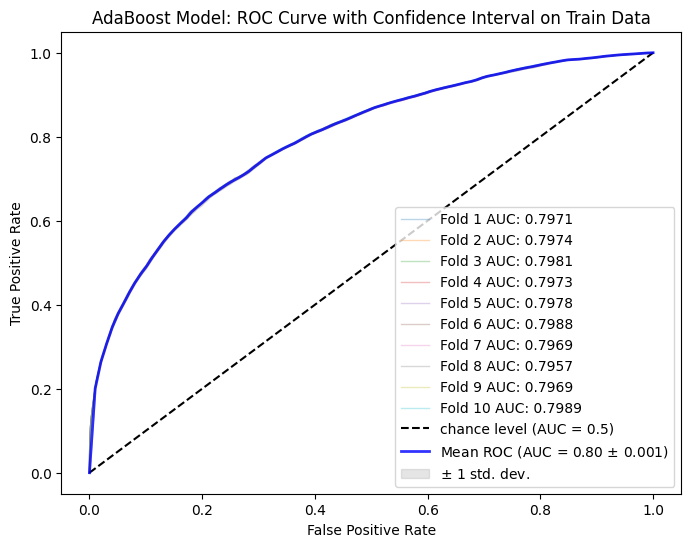

Mean AUROC: 79.70(79.6308, 79.7676)


In [ ]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(8, 6))

for i, (train_idx, test_idx) in enumerate(cv.split(X_resampled, y_resampled)):
    cv_train_X, cv_test_X = X_resampled[train_idx], X_resampled[test_idx]
    cv_train_y, cv_test_y = y_resampled[train_idx], y_resampled[test_idx]

    best_model = RandomForestClassifier(**best_params, random_state=42)

    # No need to resample again since you already have resampled data
    best_model.fit(cv_train_X, cv_train_y)
    prob_ada = best_model.predict_proba(cv_test_X)[:, 1]
    fpr, tpr, _ = roc_curve(cv_test_y, prob_ada)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, alpha=0.3, lw=1, label=f"Fold {i+1} AUC: {roc_auc:.4f}") # 여기서 label 추가
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)


ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.3f)" % (mean_auc, ci_auroc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Random Forest Model: ROC Curve with Confidence Interval on Train Data",
)
ax.legend(loc="lower right")
plt.show()

print(f"Mean AUROC: {mean_auc*100:.2f}({(mean_auc-ci_auroc)*100:.4f}, {(mean_auc+ci_auroc)*100:.4f})")

In [ ]:
print("제일 좋은 Random Forest 파라미터:", best_params)

제일 좋은 random forest 파라미터: {'class_weight': None, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 450}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import os
import pickle

# 최적의 하이퍼파라미터로 모델 학습
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_resampled, y_resampled)

# 원하는 저장 경로를 지정하세요. 예: 'C:/Users/username/models/'
fpath = 'C://Users//user//OneDrive - 경희대학교//바탕 화면//KSJ//machine learning//substance//pickles'
custom_path = fpath

# 경로에 해당하는 디렉토리가 없으면 생성
if not os.path.exists(custom_path):
    os.makedirs(custom_path)

# 원하는 경로에 학습된 모델을 피클 형식으로 저장
file_path = os.path.join(custom_path, "sub_finalized_model_rf.pkl")
with open(file_path, "wb") as f:
    pickle.dump(best_model, f)

In [ ]:
# 외부 데이터셋 불러오기 및 전처리
extra1_X = extra_validation1[data_cols]  # 외부 데이터셋에서 target 열 제거
extra1_y = extra_validation1[label_col]  # 외부 데이터셋의 target 열

In [ ]:
# 외부 데이터셋 불러오기 및 전처리
extra2_X = extra_validation2[data_cols]  # 외부 데이터셋에서 target 열 제거
extra2_y = extra_validation2[label_col]  # 외부 데이터셋의 target 열

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not

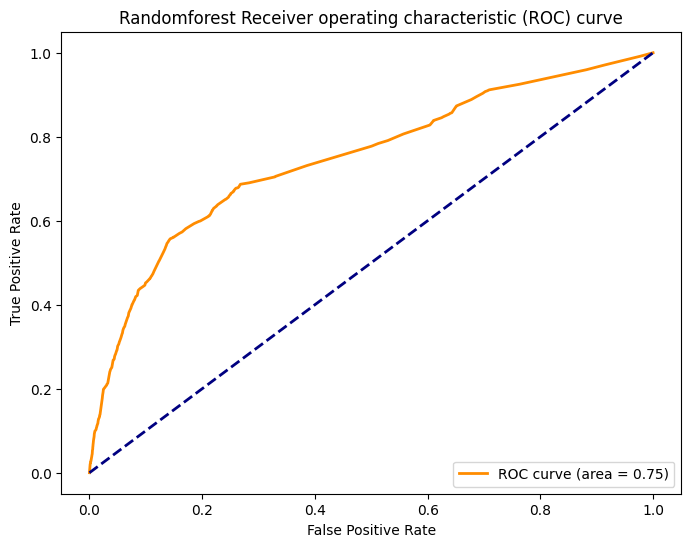

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 학습된 best_model을 사용하여 extra1_X에 대한 예측 수행
prob_extra1_rf = best_model.predict_proba(extra1_X)[:, 1]

# AUROC 곡선 그리기
fpr, tpr, _ = roc_curve(extra1_y, prob_extra1_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

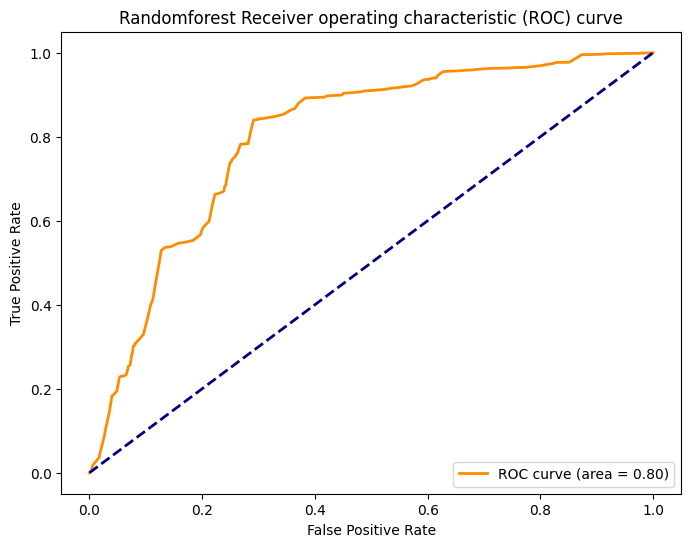

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 학습된 best_model을 사용하여 extra2_X에 대한 예측 수행
prob_extra2_rf = best_model.predict_proba(extra2_X)[:, 1]

# AUROC 곡선 그리기
fpr, tpr, _ = roc_curve(extra2_y, prob_extra2_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# 누락된 열을 NaN 값으로 추가
for col in data_cols:
    if col not in extra1_X.columns:
        extra1_X[col] = np.nan

# data_cols 순서대로 extra_X의 열을 정렬
extra1_X = extra1_X[data_cols]

# SimpleImputer 인스턴스 생성
imputer = SimpleImputer(strategy='mean')

# imputer를 train_data에 맞춤
imputer.fit(original_data[data_cols])

# extra_X 데이터셋 변환
extra1_X_imputed = imputer.transform(extra1_X)
prob_extra1_rf = best_model.predict_proba(extra1_X_imputed)[:, 1]  # 여기서 extra1_X_imputed를 사용합니다.

# 변환된 데이터를 다시 DataFrame으로 변환
extra1_X_imputed = pd.DataFrame(extra1_X_imputed, columns=data_cols)

# 최적의 threshold 찾기
optimal_threshold1 = find_optimal_threshold(extra1_y, prob_extra1_rf)

# 최적의 threshold를 사용하여 예측 수행
y_pred_extra1_opt = (prob_extra1_rf >= optimal_threshold1).astype(int)
tn_opt1, fp_opt1, fn_opt1, tp_opt1 = confusion_matrix(extra1_y, y_pred_extra1_opt).ravel()
sensitivity_opt1 = tp_opt1 / (tp_opt1 + fn_opt1)
specificity_opt1 = tn_opt1 / (tn_opt1 + fp_opt1)
accuracy_opt1 = accuracy_score(extra1_y, y_pred_extra1_opt)
balanced_accuracy_opt1 = balanced_accuracy_score(extra1_y, y_pred_extra1_opt)
auroc_opt1 = roc_auc_score(extra1_y, prob_extra1_rf)

# 최적의 threshold와 외부 데이터셋에 대한 성능 지표 출력
print(f"Optimal Threshold (EXTRA1): {optimal_threshold1:.4f}")
print(f"Sensitivity (EXTRA1): {sensitivity_opt1*100:.2f}")
print(f"Specificity (EXTRA1): {specificity_opt1*100:.2f}")
print(f"Accuracy (EXTRA1): {accuracy_opt1*100:.2f}")
print(f"Balanced Accuracy (EXTRA1): {balanced_accuracy_opt1*100:.2f}")
print(f"AUROC (EXTRA1): {auroc_opt1*100:.2f}")

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in 

Optimal Threshold: 0.3288
Sensitivity (EXTRA): 69.03
Specificity (EXTRA): 71.67
Accuracy (EXTRA): 71.22
Balanced Accuracy (EXTRA): 70.35
AUROC (EXTRA): 74.82


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [ ]:
from sklearn.impute import SimpleImputer

# 누락된 열을 NaN 값으로 추가
for col in data_cols:
    if col not in extra2_X.columns:
        extra2_X[col] = np.nan

# data_cols 순서대로 extra_X의 열을 정렬
extra2_X = extra2_X[data_cols]

# SimpleImputer 인스턴스 생성
imputer = SimpleImputer(strategy='mean')

# imputer를 train_data에 맞춤(?)
imputer.fit(original_data[data_cols])

# extra_X 데이터셋 변환
extra2_X_imputed = imputer.transform(extra2_X)
prob_extra2_rf = best_model.predict_proba(extra2_X_imputed)[:, 1]  # 여기서 extra2_X_imputed를 사용합니다.

# 변환된 데이터를 다시 DataFrame으로 변환
extra2_X_imputed = pd.DataFrame(extra2_X_imputed, columns=data_cols)

# 최적의 threshold 찾기
optimal_threshold2 = find_optimal_threshold(extra2_y, prob_extra2_rf)

# 최적의 threshold를 사용하여 예측 수행
y_pred_extra2_opt = (prob_extra2_rf >= optimal_threshold2).astype(int)
tn_opt2, fp_opt2, fn_opt2, tp_opt2 = confusion_matrix(extra2_y, y_pred_extra2_opt).ravel()
sensitivity_opt2 = tp_opt2 / (tp_opt2 + fn_opt2)
specificity_opt2 = tn_opt2 / (tn_opt2 + fp_opt2)
accuracy_opt2 = accuracy_score(extra2_y, y_pred_extra2_opt)
balanced_accuracy_opt2 = balanced_accuracy_score(extra2_y, y_pred_extra2_opt)
auroc_opt2 = roc_auc_score(extra2_y, prob_extra2_rf)

# 최적의 threshold와 외부 데이터셋에 대한 성능 지표 출력
print(f"Optimal Threshold (EXTRA2): {optimal_threshold2:.4f}")
print(f"Sensitivity (EXTRA2): {sensitivity_opt2*100:.2f}")
print(f"Specificity (EXTRA2): {specificity_opt2*100:.2f}")
print(f"Accuracy (EXTRA2): {accuracy_opt2*100:.2f}")
print(f"Balanced Accuracy (EXTRA2): {balanced_accuracy_opt2*100:.2f}")
print(f"AUROC (EXTRA2): {auroc_opt2*100:.2f}")

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in 

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

Optimal Threshold: 0.5735
Sensitivity (EXTRA): 74.51
Specificity (EXTRA): 74.70
Accuracy (EXTRA): 74.70
Balanced Accuracy (EXTRA): 74.61
AUROC (EXTRA): 80.04


Random forest Feature Importances:
                  Feature  Importance
8                 smoking    0.291745
3                   bmi_2    0.139763
7   alcoholic_consumption    0.128369
0                     SEX    0.100846
11        suicideattempts    0.098337
10       suicidalthinking    0.083864
4        household_income    0.054051
9              depression    0.053943
5                   study    0.022119
6                  stress    0.014539
1                   GRADE    0.011375
2                  region    0.001049


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


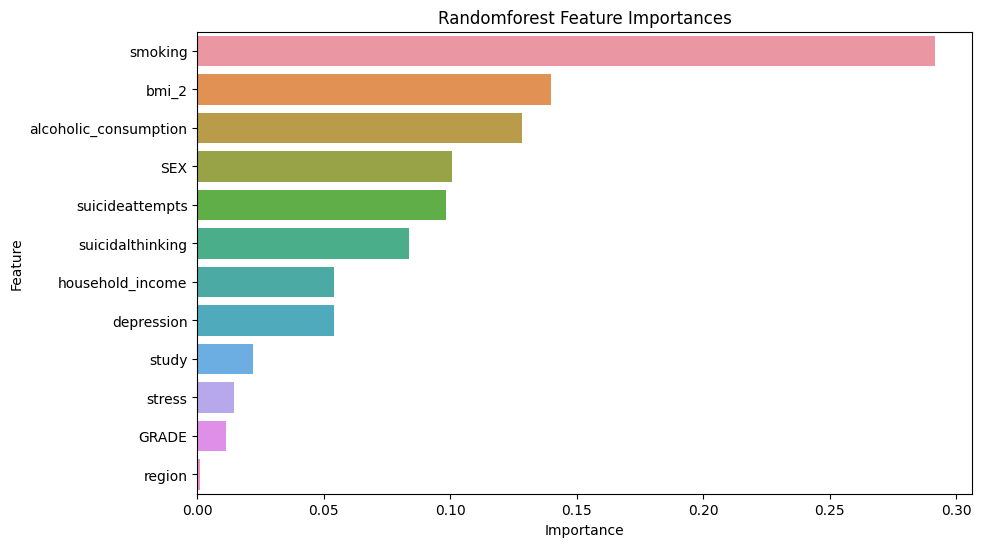

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
rf_feature_importances = best_model.feature_importances_

# Convert feature importances to a DataFrame
rf_feature_importances_df = pd.DataFrame({"Feature": data_cols, "Importance": rf_feature_importances})

# Sort feature importances in descending order
sorted_rf_feature_importances = rf_feature_importances_df.sort_values("Importance", ascending=False)

# Print feature importances
print("Random Forest Feature Importances:")
print(sorted_rf_feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'
sns.barplot(data=sorted_rf_feature_importances, x="Importance", y="Feature")
plt.title("Random Forest Feature Importances")
plt.show()